# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [148]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [149]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



586

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [150]:
units = "imperial"
baseurl = "http://api.openweathermap.org/data/2.5/weather?"
search_url = f"{baseurl}appid={weather_api_key}&units={units}&q="


name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

print('Beginning Data Retrieval')
count = 0
for city in cities:
    count += 1
    try:
        response = requests.get(search_url+city).json()
        print(f"Processing Record {count} | {city}")
        
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
               
    except KeyError:
        print("City not found. Skipping...")
        pass



Beginning Data Retrieval
Processing Record 1 | tasiilaq
Processing Record 2 | yellowknife
Processing Record 3 | barrow
Processing Record 4 | samalaeulu
City not found. Skipping...
Processing Record 5 | sur
Processing Record 6 | ketchikan
Processing Record 7 | minab
Processing Record 8 | nabire
Processing Record 9 | nalut
Processing Record 10 | busselton
Processing Record 11 | ryotsu
Processing Record 12 | rikitea
Processing Record 13 | praia da vitoria
Processing Record 14 | punta arenas
Processing Record 15 | tikhvin
Processing Record 16 | narsaq
Processing Record 17 | muborak
Processing Record 18 | aksu
Processing Record 19 | taolanaro
City not found. Skipping...
Processing Record 20 | tuktoyaktuk
Processing Record 21 | port alfred
Processing Record 22 | acarau
Processing Record 23 | batesville
Processing Record 24 | saskylakh
Processing Record 25 | salalah
Processing Record 26 | tadine
Processing Record 27 | lebu
Processing Record 28 | castro
Processing Record 29 | palmerston
Proces

Processing Record 231 | sao miguel do araguaia
Processing Record 232 | andarab
City not found. Skipping...
Processing Record 233 | laguna
Processing Record 234 | alzamay
Processing Record 235 | beloha
Processing Record 236 | shillong
Processing Record 237 | micheweni
Processing Record 238 | alice springs
Processing Record 239 | ust-maya
Processing Record 240 | hamilton
Processing Record 241 | rongcheng
Processing Record 242 | ensley
Processing Record 243 | pisco
Processing Record 244 | tanjong sepat
City not found. Skipping...
Processing Record 245 | jawhar
Processing Record 246 | el balyana
City not found. Skipping...
Processing Record 247 | ozgon
City not found. Skipping...
Processing Record 248 | auch
Processing Record 249 | la ronge
Processing Record 250 | khilok
Processing Record 251 | kavaratti
Processing Record 252 | sabang
Processing Record 253 | coihaique
Processing Record 254 | sao joao da barra
Processing Record 255 | plettenberg bay
Processing Record 256 | yelizovo
Processi

Processing Record 463 | concarneau
Processing Record 464 | broome
Processing Record 465 | danielskuil
Processing Record 466 | taoudenni
Processing Record 467 | emerald
Processing Record 468 | san cristobal
Processing Record 469 | borama
City not found. Skipping...
Processing Record 470 | kiunga
Processing Record 471 | bulgan
Processing Record 472 | rockport
Processing Record 473 | chaohu
Processing Record 474 | oranjestad
Processing Record 475 | cervo
Processing Record 476 | fuente de oro
Processing Record 477 | kijang
Processing Record 478 | cheuskiny
City not found. Skipping...
Processing Record 479 | vallecillo
Processing Record 480 | nisia floresta
Processing Record 481 | rabo de peixe
Processing Record 482 | kununurra
Processing Record 483 | uruzgan
Processing Record 484 | ylivieska
Processing Record 485 | mount pleasant
Processing Record 486 | vaitupu
City not found. Skipping...
Processing Record 487 | carballo
Processing Record 488 | kamenskoye
City not found. Skipping...
Proces

In [3]:
# original

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pimentel
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | padang
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | kahului
Processing Record 6 of Set 1 | rocha
Processing Record 7 of Set 1 | pangai
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | watsa
Processing Record 14 of Set 1 | rosetta
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | u

Processing Record 38 of Set 4 | tres picos
Processing Record 39 of Set 4 | saint-francois
Processing Record 40 of Set 4 | bubaque
Processing Record 41 of Set 4 | mackay
Processing Record 42 of Set 4 | kirakira
Processing Record 43 of Set 4 | banda aceh
Processing Record 44 of Set 4 | bang saphan
Processing Record 45 of Set 4 | chuy
Processing Record 46 of Set 4 | san juan
Processing Record 47 of Set 4 | waingapu
Processing Record 48 of Set 4 | santa isabel
Processing Record 49 of Set 4 | turukhansk
Processing Record 0 of Set 5 | saurimo
Processing Record 1 of Set 5 | ambon
Processing Record 2 of Set 5 | ambulu
Processing Record 3 of Set 5 | olafsvik
Processing Record 4 of Set 5 | ahipara
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | beringovskiy
Processing Record 7 of Set 5 | sobolevo
Processing Record 8 of Set 5 | tateyama
Processing Record 9 of Set 5 | shambu
Processing Record 10 of Set 5 | dingle
Processing Record 11 of Set 5 | nizhneyansk
City not found. Ski

Processing Record 28 of Set 8 | mongomo
Processing Record 29 of Set 8 | hunza
City not found. Skipping...
Processing Record 30 of Set 8 | bow island
Processing Record 31 of Set 8 | moerai
Processing Record 32 of Set 8 | xichang
Processing Record 33 of Set 8 | sakhnovshchyna
Processing Record 34 of Set 8 | northam
Processing Record 35 of Set 8 | santa rosa
Processing Record 36 of Set 8 | severo-yeniseyskiy
Processing Record 37 of Set 8 | madera
Processing Record 38 of Set 8 | rizhao
Processing Record 39 of Set 8 | okhotsk
Processing Record 40 of Set 8 | bani
Processing Record 41 of Set 8 | awjilah
Processing Record 42 of Set 8 | miles city
Processing Record 43 of Set 8 | ulaanbaatar
Processing Record 44 of Set 8 | lagoa
Processing Record 45 of Set 8 | syasstroy
Processing Record 46 of Set 8 | honiara
Processing Record 47 of Set 8 | east london
Processing Record 48 of Set 8 | karakol
Processing Record 49 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 0 of Set 9 | andr

Processing Record 14 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 15 of Set 12 | adeje
Processing Record 16 of Set 12 | simpang
Processing Record 17 of Set 12 | athabasca
Processing Record 18 of Set 12 | prince rupert
Processing Record 19 of Set 12 | bilibino
Processing Record 20 of Set 12 | sayyan
Processing Record 21 of Set 12 | figline valdarno
Processing Record 22 of Set 12 | srednekolymsk
Processing Record 23 of Set 12 | kapit
Processing Record 24 of Set 12 | erenhot
Processing Record 25 of Set 12 | zachagansk
City not found. Skipping...
Processing Record 26 of Set 12 | toftir
City not found. Skipping...
Processing Record 27 of Set 12 | agdam
Processing Record 28 of Set 12 | indianola
Processing Record 29 of Set 12 | honiton
Processing Record 30 of Set 12 | batemans bay
Processing Record 31 of Set 12 | namtsy
Processing Record 32 of Set 12 | bonoua
Processing Record 33 of Set 12 | aracati
Processing Record 34 of Set 12 | mareeba
Processing Record 35 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [151]:
# print(len(name))
# print(len(lat))
# print(len(lng))
# print(len(max_temp))
# print(len(humidity))
# print(len(cloudiness))
# print(len(wind_speed))
# print(len(country))
# print(len(date))

data_df = pd.DataFrame({
    "City":name,
    "Lat":lat,
    "Lng":lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date":date   
                       })

data_df




,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.61,-37.64,42.80,87,100,6.93,GL,1593380195
1,Yellowknife,62.46,-114.35,68.00,37,20,8.05,CA,1593380445
2,Barrow,71.29,-156.79,51.80,66,1,11.41,US,1593380229
3,Sur,22.57,59.53,85.42,70,59,16.17,OM,1593380445
4,Ketchikan,55.34,-131.65,68.00,60,1,14.99,US,1593380445
...,...,...,...,...,...,...,...,...,...
529,Khovu-Aksy,51.13,93.60,53.28,88,31,2.42,RU,1593380490
530,Malibu,34.01,-118.81,69.01,85,89,5.99,US,1593380490
531,Airai,-8.93,125.41,57.51,100,97,3.36,TL,1593380490
532,Timrå,62.49,17.33,63.00,59,50,6.93,SE,1593380490


In [4]:
# original

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [152]:
# Save Data to csv
data_df.to_csv("City_Weather.csv")
data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.61,-37.64,42.80,87,100,6.93,GL,1593380195
1,Yellowknife,62.46,-114.35,68.00,37,20,8.05,CA,1593380445
2,Barrow,71.29,-156.79,51.80,66,1,11.41,US,1593380229
3,Sur,22.57,59.53,85.42,70,59,16.17,OM,1593380445
4,Ketchikan,55.34,-131.65,68.00,60,1,14.99,US,1593380445
...,...,...,...,...,...,...,...,...,...
529,Khovu-Aksy,51.13,93.60,53.28,88,31,2.42,RU,1593380490
530,Malibu,34.01,-118.81,69.01,85,89,5.99,US,1593380490
531,Airai,-8.93,125.41,57.51,100,97,3.36,TL,1593380490
532,Timrå,62.49,17.33,63.00,59,50,6.93,SE,1593380490


In [5]:
# original

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [153]:
data_describe = data_df.describe()
data_describe

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,5.340000e+02
mean,20.698858,19.720037,67.743446,71.936330,46.992509,8.414363,1.593380e+09
std,33.440306,90.054952,14.472505,19.934124,36.704590,5.510092,9.065481e+01
min,-54.800000,-179.170000,30.200000,3.000000,0.000000,0.540000,1.593380e+09
25%,-6.015000,-57.590000,56.690000,61.000000,9.000000,3.985000,1.593380e+09
50%,28.120000,23.470000,69.010000,77.000000,40.000000,6.930000,1.593380e+09
75%,48.085000,99.667500,78.800000,87.000000,82.000000,11.410000,1.593380e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,35.570000,1.593380e+09


In [6]:
# original

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [154]:
#  Get the indices of cities that have humidity over 100%.
data_df.dtypes


# cities_df = data_df.loc[data_df['Humidity']>=100]
# cities_df

index = data_df[data_df['Humidity']>=100].index
index
# # Delete these row indexes from dataFrame
# dfObj.drop(indexNames , inplace=True)


Int64Index([ 31,  42,  48,  64,  88, 123, 138, 141, 214, 292, 305, 311, 344,
            373, 415, 431, 476, 490, 531, 533],
           dtype='int64')

In [155]:
# clean_city_data = data_df.loc[data_df['Humidity']<=100]
# clean_city_data

clean_city_data = data_df.drop(index , inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.61,-37.64,42.80,87,100,6.93,GL,1593380195
1,Yellowknife,62.46,-114.35,68.00,37,20,8.05,CA,1593380445
2,Barrow,71.29,-156.79,51.80,66,1,11.41,US,1593380229
3,Sur,22.57,59.53,85.42,70,59,16.17,OM,1593380445
4,Ketchikan,55.34,-131.65,68.00,60,1,14.99,US,1593380445
...,...,...,...,...,...,...,...,...,...
527,Katakwi,1.89,33.97,65.77,87,18,3.56,UG,1593380490
528,Zavyalovo,54.51,82.45,53.60,76,19,6.71,RU,1593380490
529,Khovu-Aksy,51.13,93.60,53.28,88,31,2.42,RU,1593380490
530,Malibu,34.01,-118.81,69.01,85,89,5.99,US,1593380490


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [156]:
# Extract relevant fields from the data frame
clean_city_data_df = clean_city_data[['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country']]
clean_city_data_df

# Export the City_Data into a csv

clean_city_data_df.to_csv("Clean_City_Data.csv")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

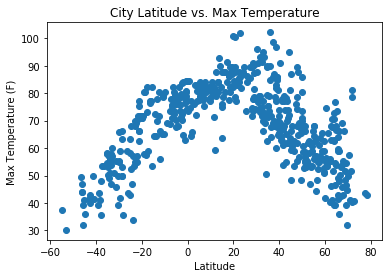

In [157]:
lat = clean_city_data_df['Lat']
temp = clean_city_data_df['Max Temp']
# print(temp)

plt.scatter(lat,temp)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')


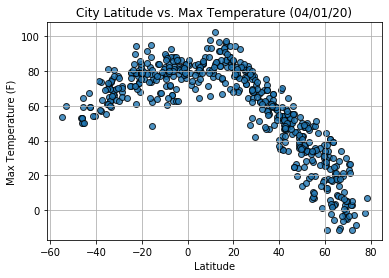

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

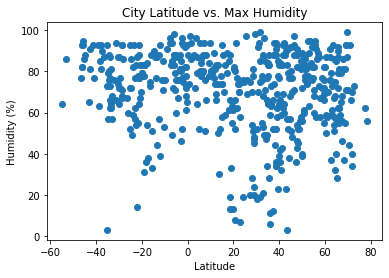

In [158]:
lat = clean_city_data_df['Lat']
humidity = clean_city_data_df['Humidity']
# print(temp)

plt.scatter(lat,humidity)
plt.title('City Latitude vs. Max Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

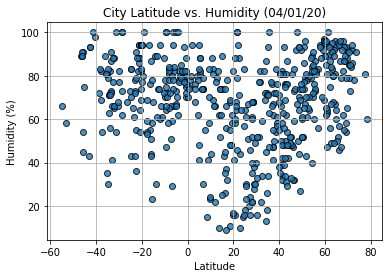

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

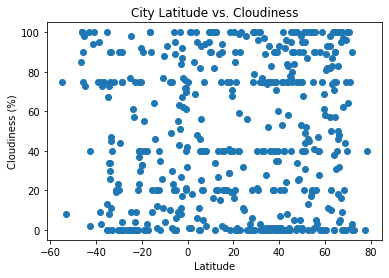

In [159]:
lat = clean_city_data_df['Lat']
cloudiness = clean_city_data_df['Cloudiness']
# print(temp)

plt.scatter(lat,cloudiness)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

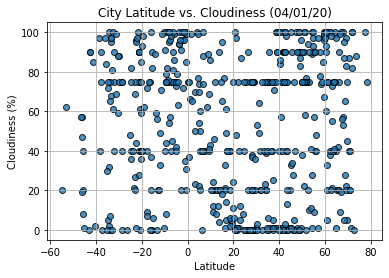

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

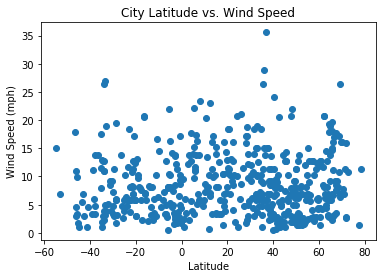

In [160]:
lat = clean_city_data_df['Lat']
wind_speed = clean_city_data_df['Wind Speed']
# print(temp)

plt.scatter(lat,wind_speed)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

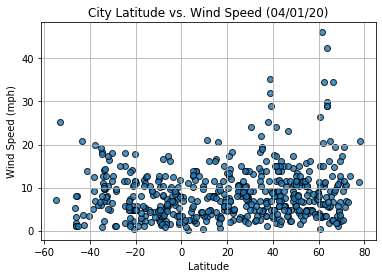

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
correlation = st.pearsonr(avg_volume, weight)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_volume, weight)
regress_values = avg_volume * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

plt.scatter(avg_volume, weight)
plt.xlabel('Average Tumor Volume')
plt.ylabel('Weight (g)')
plt.title('Mouse Weight vs. Avg Tumor Volume - Capomulin ')
plt.plot(avg_volume, regress_values, "r-")

The r-squared is: 0.8271188905041935


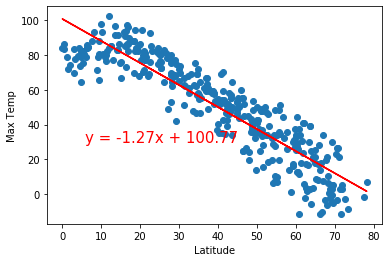

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


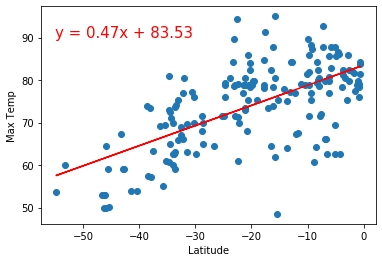

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


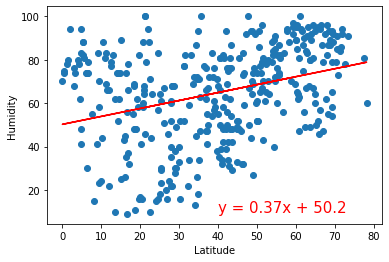

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


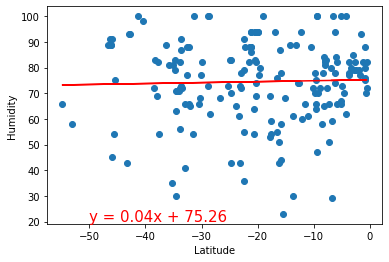

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


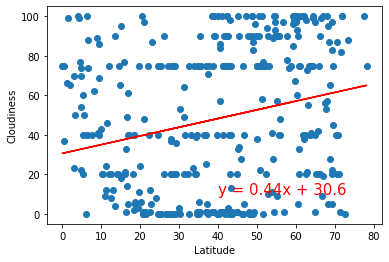

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


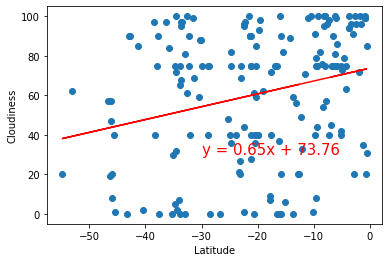

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


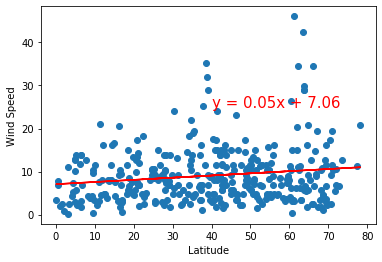

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


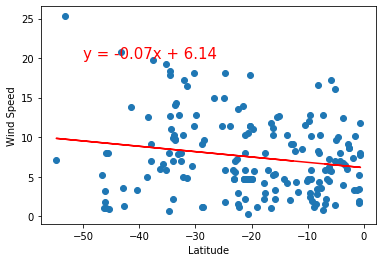